In [222]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [223]:
pip install SQLAlchemy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [224]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
from sqlalchemy import inspect
from sqlalchemy import create_engine, text
import ast  # Para convertir texto en listas de Python

In [225]:
pip install word2number

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [226]:
from word2number import w2n

In [227]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [228]:
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [229]:
def grafico_pastel(df, columna, titulo):
    valores = df[columna].value_counts()
    colores = plt.cm.Pastel1.colors  # paleta de colores claritos
    plt.pie(
        valores, 
        labels=valores.index, 
        autopct="%1.1f%%", 
        startangle=90, 
        colors=colores[:len(valores)]  # asegura que se usan solo los necesarios
    )
    plt.title(titulo)
    plt.show()

In [230]:
df = pd.read_csv("optimizacion_talento.csv")

In [280]:
# eliminar filas donde overtime es "unknown"
df = df[df['overtime'] != 'Unknown']

In [231]:
df = pd.read_csv("data/optimizacion_talento.csv", index_col=0)

In [232]:
df.head()

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,numcompaniesworked,overtime,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,51,No,No Travel,Research & Development,6,3,Other,1,1,Female,3,5,Research Director,3,Unknown,7,No,3,3,0,5,3,20,15,15,1972,195370.00,Sí
1,52,No,No Travel,Sales,1,4,Life Sciences,2,3,Female,2,5,Manager,3,Unknown,0,Unknown,3,1,1,5,3,33,11,9,1971,199990.00,Sí
2,42,No,Travel Rarely,Sales,4,2,Technical Degree,3,3,Female,3,5,Manager,4,Married,1,No,3,4,0,3,3,22,11,15,1981,192320.00,Sí
3,47,No,Travel Rarely,Research & Development,2,4,Medical,4,1,Male,3,4,Research Director,3,Married,3,Unknown,3,2,2,2,3,20,5,6,1976,171690.00,No
4,46,No,No Travel,Sales,3,3,Technical Degree,5,1,Male,4,4,Sales Executive,1,Divorced,2,No,3,4,1,5,3,19,2,8,1977,153407.04,No


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1614 non-null   int64  
 1   attrition                 1614 non-null   object 
 2   businesstravel            1614 non-null   object 
 3   department                1614 non-null   object 
 4   distancefromhome          1614 non-null   int64  
 5   education                 1614 non-null   int64  
 6   educationfield            1614 non-null   object 
 7   employeenumber            1614 non-null   int64  
 8   environmentsatisfaction   1614 non-null   int64  
 9   gender                    1614 non-null   object 
 10  jobinvolvement            1614 non-null   int64  
 11  joblevel                  1614 non-null   int64  
 12  jobrole                   1614 non-null   object 
 13  jobsatisfaction           1614 non-null   int64  
 14  maritalstatus

In [234]:
print(df.shape)

(1614, 28)


Obtenemos la matriz de correlación para poder ver las relaciones entre las variables

In [235]:
# Matriz de correlación
num_vars = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[num_vars].corr()

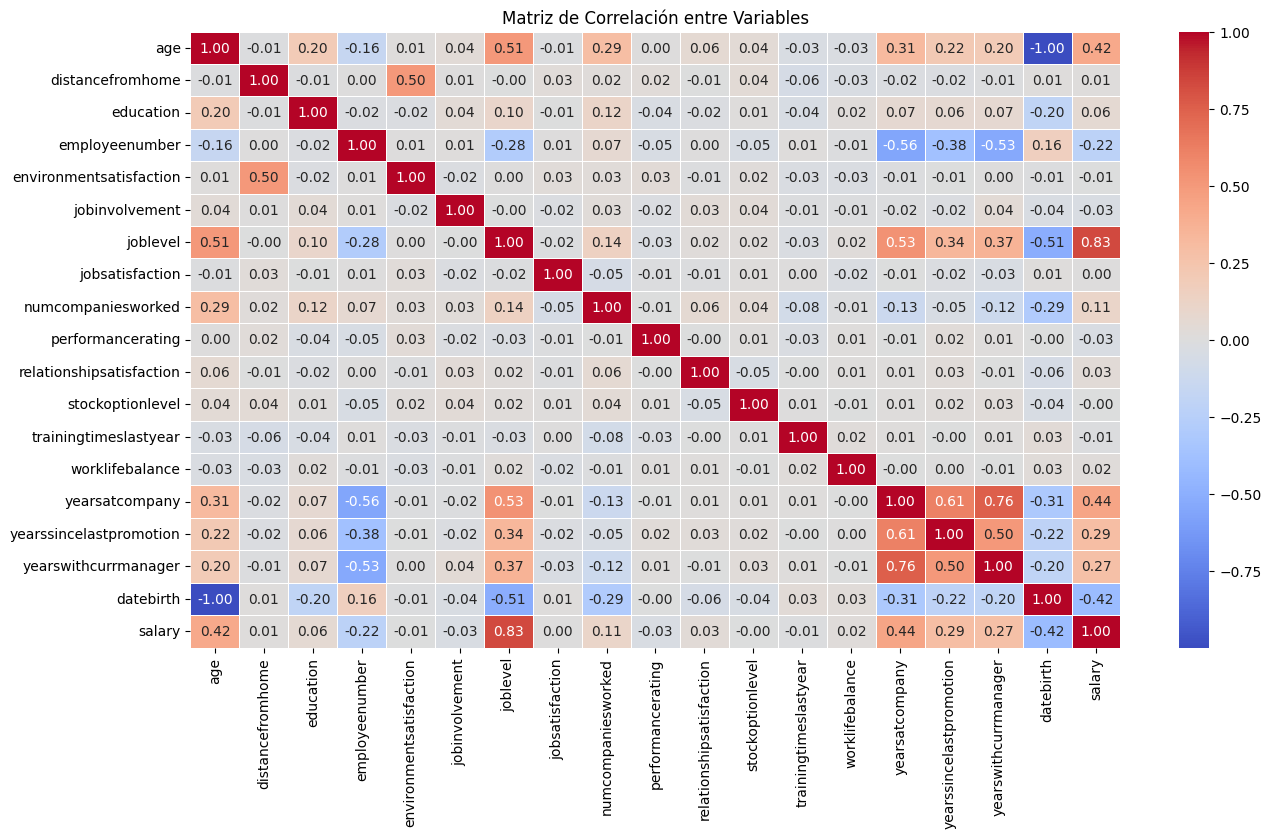

In [236]:
# Visualiza la matriz de correlación utilizando seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

In [286]:
palettes = sns.color_palette("coolwarm", 2)
palettes4 = sns.color_palette("coolwarm", 4)

In [291]:
sns.set_palette("Pastel1")   # paleta de colores clara

In [292]:
mascara = df["attrition"]=="Yes"
media_edad_salidas = df[mascara]
media_edad_salidas

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,numcompaniesworked,overtime,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework,veterania
13,41,Yes,Travel Rarely,Research & Development,12,3,Other,14,2,Male,3,5,Research Director,3,Married,1,No,3,4,0,0,3,22,15,8,1982,195450.00,No,+ de 10 años
16,58,Yes,Travel Rarely,Research & Development,2,4,Other,17,4,Female,3,5,Research Director,2,Single,7,Yes,3,4,0,2,3,31,13,8,1965,192460.00,No,+ de 10 años
26,52,Yes,No Travel,Sales,2,1,Other,27,1,Male,1,5,Manager,4,Married,1,No,3,4,1,3,3,32,6,9,1971,198450.00,Sí,+ de 10 años
98,45,Yes,No Travel,Sales,13,3,Marketing,99,1,Male,1,5,Manager,2,Unknown,2,Yes,3,1,0,2,3,24,1,11,1978,191324.62,Sí,+ de 10 años
158,34,Yes,Travel Rarely,Sales,24,4,Other,159,1,Male,2,2,Sales Executive,2,Single,0,Yes,4,3,0,2,4,15,10,10,1989,53914.11,No,+ de 10 años
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,25,Yes,Travel Rarely,Research & Development,3,3,Medical,1540,1,Female,3,1,Laboratory Technician,1,Married,5,No,3,3,1,5,3,2,0,2,1998,28111.13,Sí,-= de 10 años
1559,41,Yes,No Travel,Sales,4,3,Other,1560,1,Female,3,2,Sales Executive,2,Unknown,1,No,3,3,0,5,3,8,7,7,1982,53914.11,Sí,-= de 10 años
1569,26,Yes,Travel Frequently,Human Resources,17,4,Life Sciences,1570,2,Male,3,1,Human Resources,3,Unknown,0,Yes,3,2,1,2,3,7,1,0,1997,27410.00,Sí,-= de 10 años
1588,28,Yes,No Travel,Research & Development,1,2,Other,1589,1,Male,1,1,Research Scientist,2,Unknown,7,Yes,3,4,0,4,3,7,3,7,1995,22160.00,Sí,-= de 10 años


In [293]:
media_edad_salidas.describe().T

,count,mean,std,min,25%,50%,75%,max
age,151.0,33.278146,9.542298,18.0,26.50,31.00,40.00,58.0
distancefromhome,151.0,12.072848,10.194181,1.0,3.00,9.00,19.50,45.0
education,151.0,2.794702,0.954413,1.0,2.00,3.00,3.00,5.0
employeenumber,151.0,968.357616,422.758534,14.0,643.50,1031.00,1341.50,1605.0
environmentsatisfaction,151.0,3.490066,5.597461,1.0,1.00,3.00,3.50,42.0
jobinvolvement,151.0,2.443709,0.796959,1.0,2.00,3.00,3.00,4.0
joblevel,151.0,1.602649,0.952747,1.0,1.00,1.00,2.00,5.0
jobsatisfaction,151.0,2.490066,1.118735,1.0,1.00,3.00,3.00,4.0
numcompaniesworked,151.0,3.231788,2.696773,0.0,1.00,2.00,5.00,9.0
performancerating,151.0,3.139073,0.347174,3.0,3.00,3.00,3.00,4.0


In [349]:
def grafico_pastel(df, columna, titulo):
    valores = df[columna].value_counts()
    plt.pie(valores, labels=valores.index, autopct="%1.1f%%", startangle=90)
    plt.title(titulo)
    plt.show()

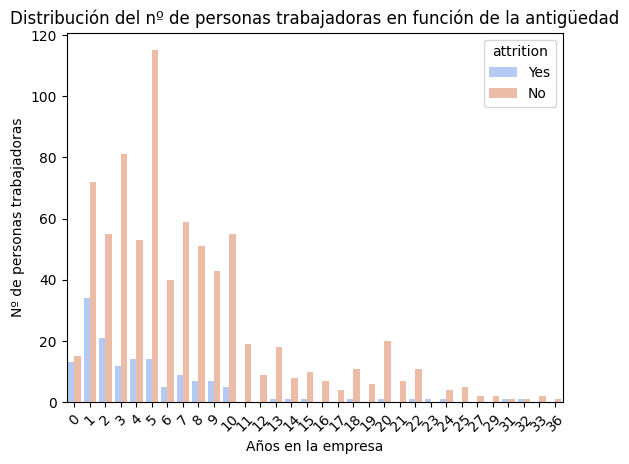

In [ ]:
sns.countplot(x='yearsatcompany', data=df, palette = palettes , hue = 'attrition')

plt.xticks(rotation=45)

plt.xlabel("Años en la empresa")
plt.ylabel("Nº de personas trabajadoras")
plt.title('Distribución del nº de personas trabajadoras en función de la antigüedad')
plt.show()

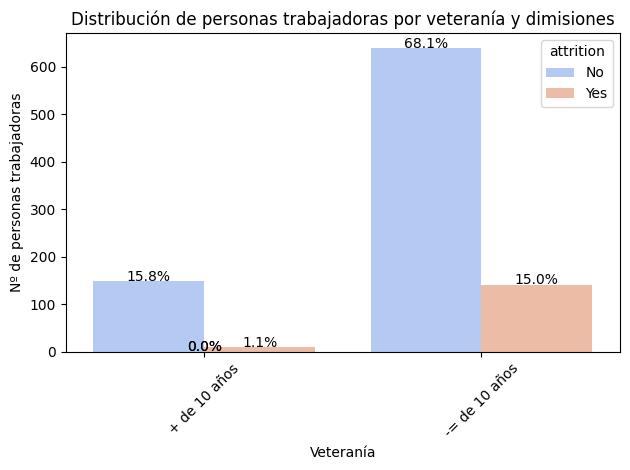

In [350]:
grafico = sns.countplot(x='veterania', data= df, palette = palettes, hue = 'attrition')

plt.xticks(rotation=45)

plt.xlabel("Veteranía")
plt.ylabel("Nº de personas trabajadoras")

total = len(df)
for p in grafico.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    grafico.text(
        p.get_x() + p.get_width() / 2, 
        height + 1,  # Ajuste para que no tape la barra
        percentage, 
        ha='center'
    )

plt.title("Distribución de personas trabajadoras por veteranía y dimisiones")
plt.tight_layout()
plt.show()

In [301]:
def grafico_pastel(df, columna, titulo):
    valores = df[columna].value_counts()
    plt.pie(valores, labels=valores.index, autopct="%1.1f%%", startangle=90)
    plt.title(titulo)
    plt.show()

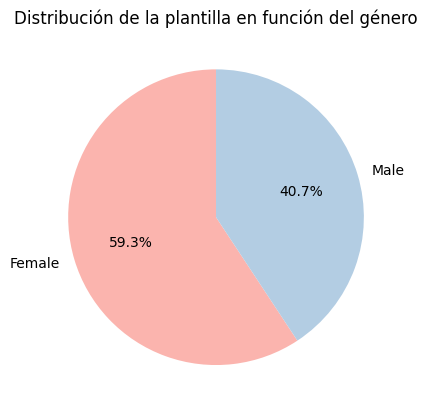

In [302]:
grafico_pastel(df, 'gender', 'Distribución de la plantilla en función del género')

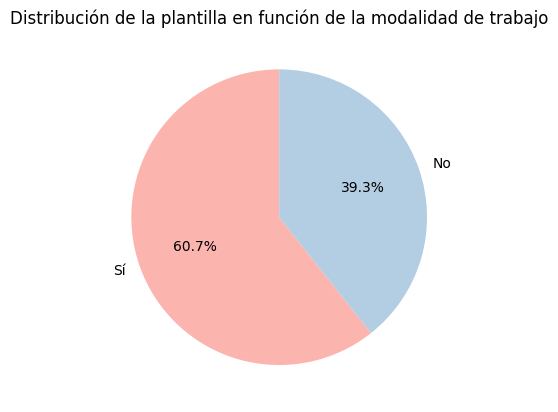

In [303]:
grafico_pastel(df, 'remotework', 'Distribución de la plantilla en función de la modalidad de trabajo')

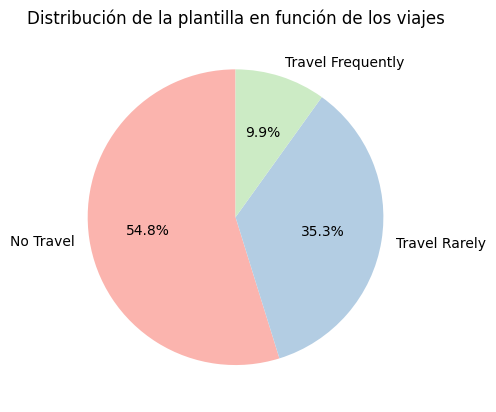

In [304]:
grafico_pastel(df, 'businesstravel', 'Distribución de la plantilla en función de los viajes')

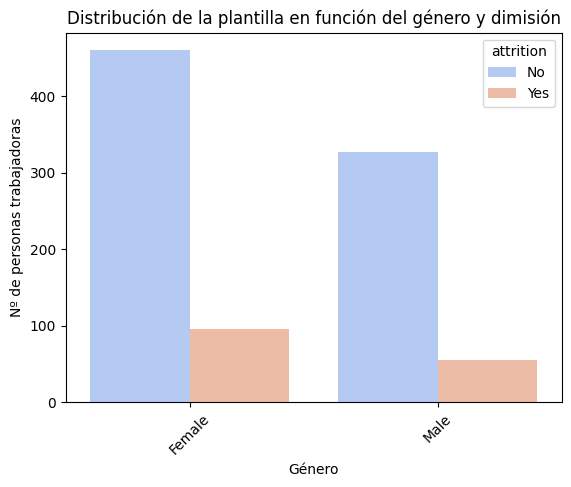

In [305]:
sns.countplot(x='gender', data=df, palette = palettes, hue = 'attrition')

plt.xticks(rotation=45)

plt.xlabel("Género")
plt.ylabel("Nº de personas trabajadoras")
plt.title("Distribución de la plantilla en función del género y dimisión")

plt.show()

In [306]:
df_ylp_s = df.groupby("jobsatisfaction").agg({
    "employeenumber": "nunique",
    "yearssincelastpromotion": "mean"}).reset_index()
df_ylp_s

,jobsatisfaction,employeenumber,yearssincelastpromotion
0,1,169,2.242604
1,2,185,2.378378
2,3,297,2.033670
3,4,287,1.996516


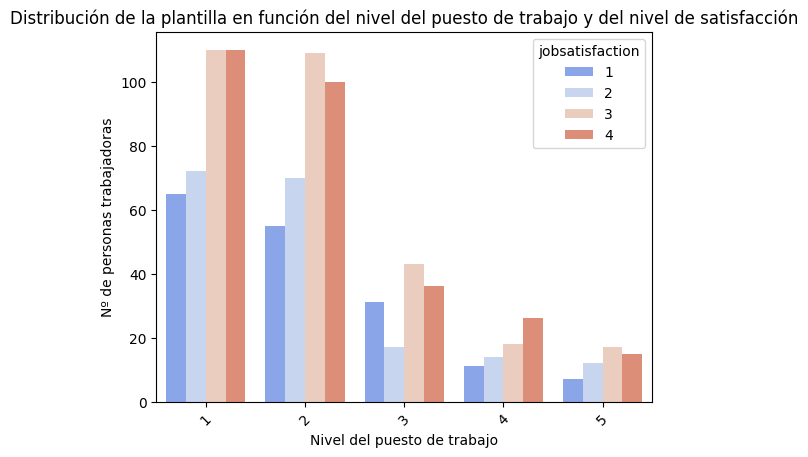

In [307]:
sns.countplot(x='joblevel', data=df, palette = palettes4 , hue = 'jobsatisfaction')

plt.xticks(rotation=45)

plt.xlabel("Nivel del puesto de trabajo")
plt.ylabel("Nº de personas trabajadoras")
plt.title("Distribución de la plantilla en función del nivel del puesto de trabajo y del nivel de satisfacción")
plt.show()

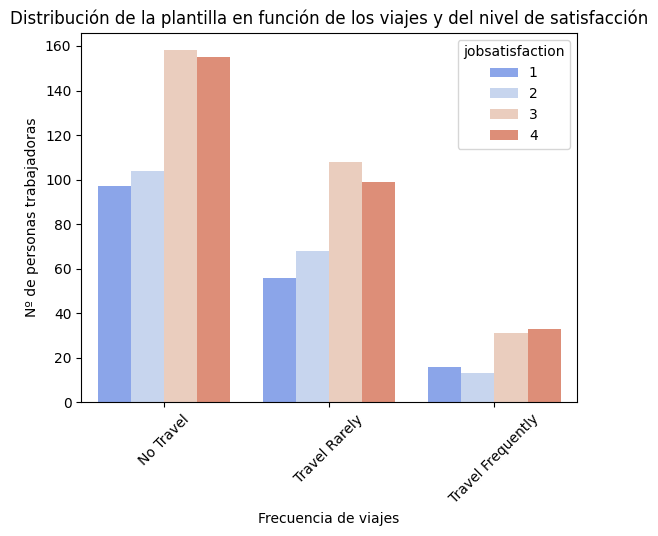

In [309]:
sns.countplot(x='businesstravel', data=df, palette = palettes4, hue = 'jobsatisfaction')

plt.xticks(rotation=45)

plt.xlabel("Frecuencia de viajes")
plt.ylabel("Nº de personas trabajadoras")
plt.title("Distribución de la plantilla en función de los viajes y del nivel de satisfacción")
plt.show()

In [310]:
print(df.columns)   # ver si están jobrole y jobsatisfaction
print(df['jobrole'].unique()[:5])   # ver algunos valores
print(df['jobsatisfaction'].unique())

Index(['age', 'attrition', 'businesstravel', 'department', 'distancefromhome',
       'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'jobinvolvement', 'joblevel',
       'jobrole', 'jobsatisfaction', 'maritalstatus', 'numcompaniesworked',
       'overtime', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'datebirth', 'salary', 'remotework', 'veterania'],
      dtype='object')
['Research Director' 'Manager' 'Sales Executive' 'Manufacturing Director'
 'Laboratory Technician']
[3 4 1 2]


In [311]:
# Limpieza de la columna jobrole
df['jobrole'] = df['jobrole'].str.strip().str.title()

# Opcional: ver los valores únicos después de limpiar
print(df['jobrole'].unique())

['Research Director' 'Manager' 'Sales Executive' 'Manufacturing Director'
 'Laboratory Technician' 'Research Scientist' 'Healthcare Representative'
 'Sales Representative' 'Human Resources']


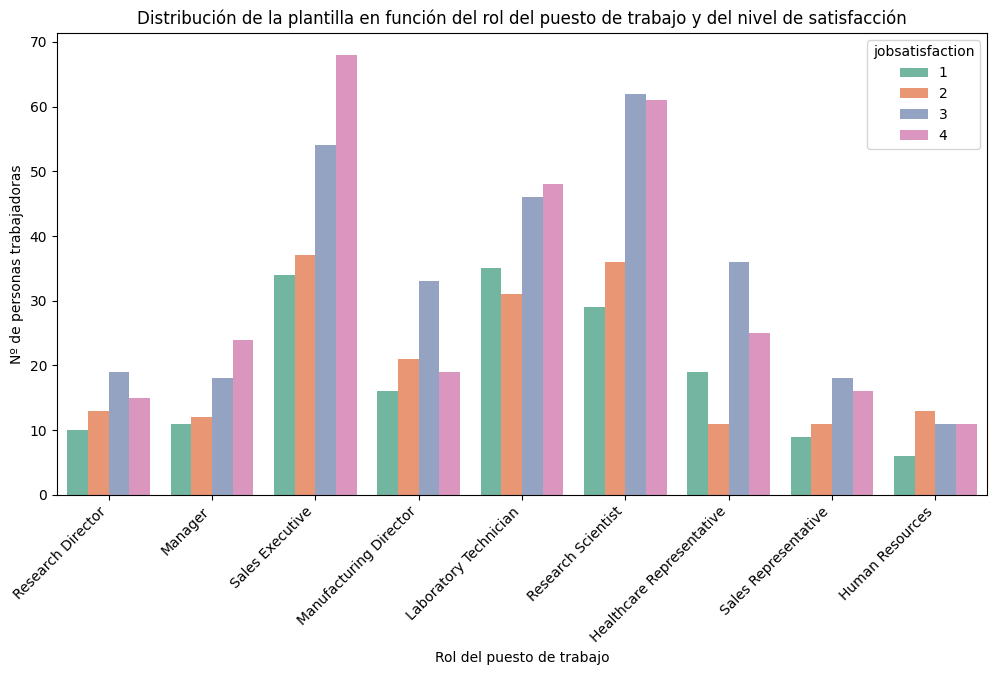

In [312]:
plt.figure(figsize=(12, 6))
sns.countplot(x='jobrole', data=df, hue='jobsatisfaction', palette='Set2')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rol del puesto de trabajo")
plt.ylabel("Nº de personas trabajadoras")
plt.title("Distribución de la plantilla en función del rol del puesto de trabajo y del nivel de satisfacción")
plt.show()


C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\1272838221.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\1272838221.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


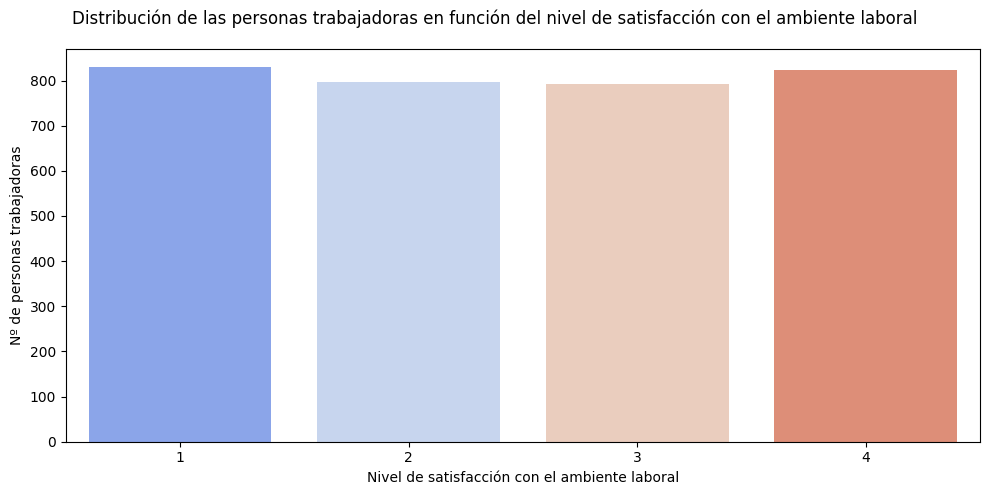

In [313]:
# Definimos el orden
orden_environmentsatisfaction = ["1", "2", "3", "4"]

# Creamos la gráfica
plt.figure(figsize=(10, 5)) 
sns.barplot(
    x="environmentsatisfaction", 
    y="employeenumber", 
    data=df,
    ci=None,
    palette="coolwarm",
    order=orden_environmentsatisfaction
)
plt.xlabel("Nivel de satisfacción con el ambiente laboral")
plt.ylabel("Nº de personas trabajadoras")
plt.suptitle("Distribución de las personas trabajadoras en función del nivel de satisfacción con el ambiente laboral")
plt.tight_layout()

C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\1407053645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


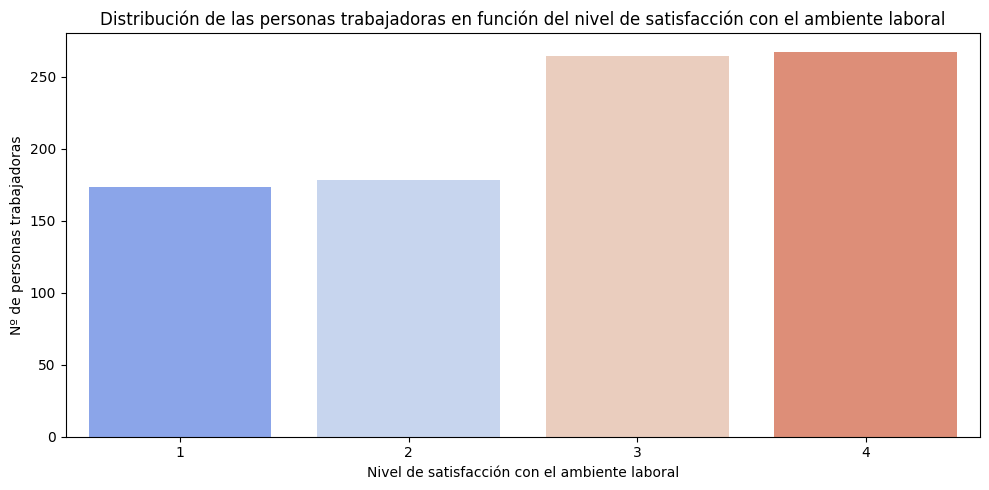

In [314]:
plt.figure(figsize=(10, 5))
sns.countplot(
    x="environmentsatisfaction",
    data=df,
    palette="coolwarm",
    order=["1", "2", "3", "4"]  
)
plt.xlabel("Nivel de satisfacción con el ambiente laboral")
plt.ylabel("Nº de personas trabajadoras")
plt.title("Distribución de las personas trabajadoras en función del nivel de satisfacción con el ambiente laboral")
plt.tight_layout()
plt.show()

C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\106927136.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "jobinvolvement",
C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\106927136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "jobinvolvement",


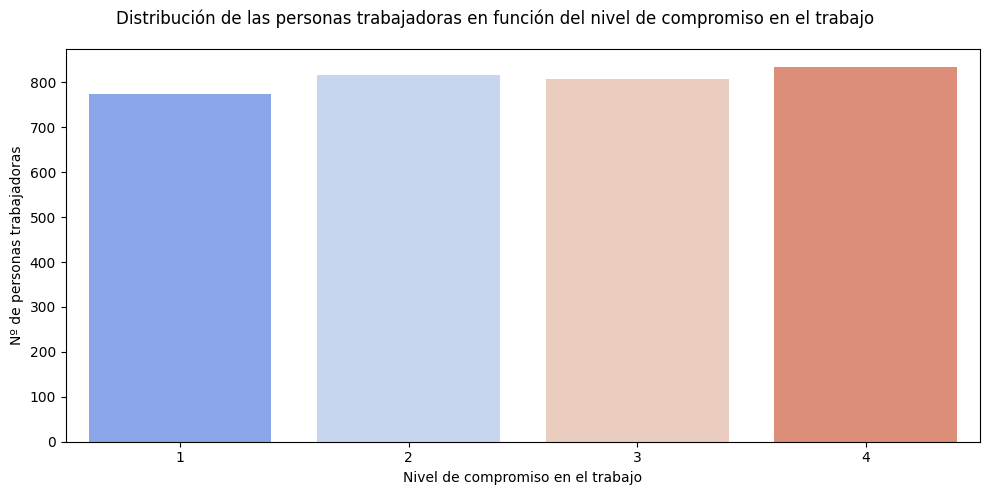

In [315]:
orden_jobinvolvement = ["1", "2", "3", "4"]
plt.figure(figsize=(10, 5)) 
sns.barplot(x = "jobinvolvement", 
            y = "employeenumber", 
            data = df,
            ci = None,
            palette = "coolwarm",
            order = orden_jobinvolvement)
plt.xlabel("Nivel de compromiso en el trabajo")
plt.ylabel("Nº de personas trabajadoras")
plt.suptitle("Distribución de las personas trabajadoras en función del nivel de compromiso en el trabajo")
plt.tight_layout()

C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\2746429903.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "jobsatisfaction",
C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\2746429903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "jobsatisfaction",


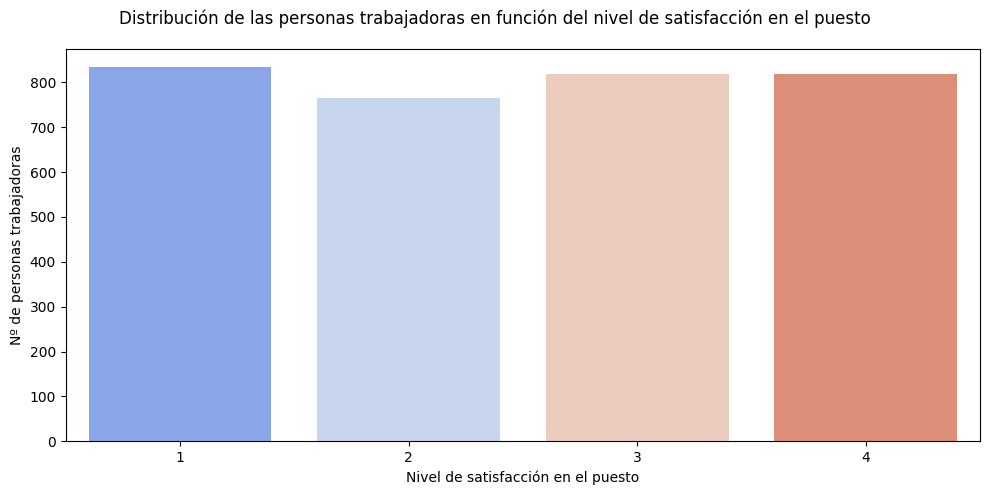

In [316]:
orden_jobsatisfaction = ["1", "2", "3", "4"]
plt.figure(figsize=(10, 5)) 
sns.barplot(x = "jobsatisfaction", 
            y = "employeenumber", 
            data = df,
            ci = None,
            palette = "coolwarm",
            order = orden_jobinvolvement)
plt.xlabel("Nivel de satisfacción en el puesto")
plt.ylabel("Nº de personas trabajadoras")
plt.suptitle("Distribución de las personas trabajadoras en función del nivel de satisfacción en el puesto")
plt.tight_layout()

C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\3582552254.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "relationshipsatisfaction",
C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\3582552254.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "relationshipsatisfaction",


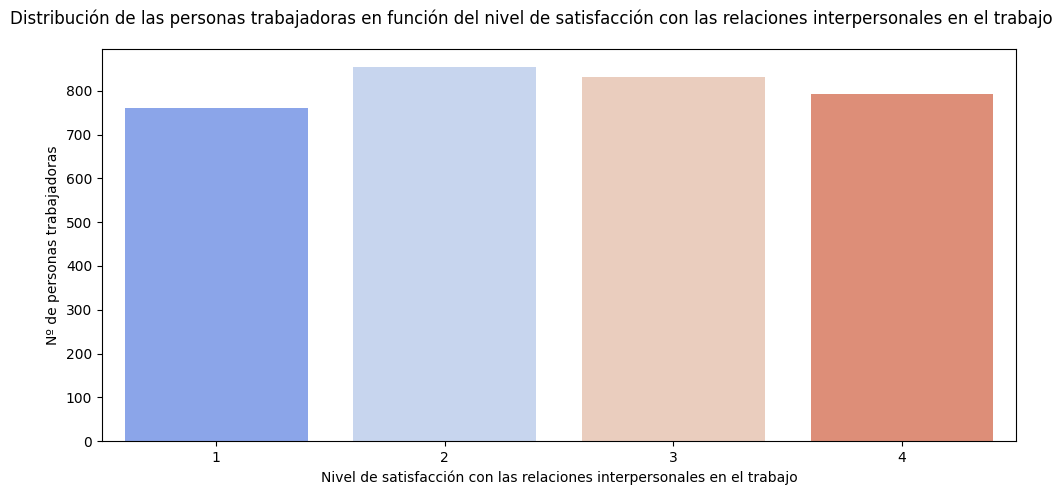

In [317]:
orden_jobsatisfaction = ["1", "2", "3", "4"]
plt.figure(figsize=(10, 5)) 
sns.barplot(x = "relationshipsatisfaction", 
            y = "employeenumber", 
            data = df,
            ci = None,
            palette = "coolwarm",
            order = orden_jobinvolvement)
plt.xlabel("Nivel de satisfacción con las relaciones interpersonales en el trabajo")
plt.ylabel("Nº de personas trabajadoras")
plt.suptitle("Distribución de las personas trabajadoras en función del nivel de satisfacción con las relaciones interpersonales en el trabajo")
plt.tight_layout()

In [318]:
# Se hacen agrupaciones en función de los niveles de satisfacción de distintas variables y su media salarial, para poder ver si el salario está relacionado con el nivel de satisfacción. 
df_sal_satis = df.groupby("environmentsatisfaction").agg({
    "salary": "mean"}).reset_index()
df_sal_satis

,environmentsatisfaction,salary
0,1,69617.425318
1,2,63585.741573
2,3,68002.329811
3,4,64924.469625
4,10,28111.130000
5,11,61167.055000
6,12,37947.782500
7,13,65475.330000
8,14,53914.110000
9,15,99850.000000


In [319]:
df_sal_satis_2 = df.groupby("jobinvolvement").agg({
    "salary": "mean"}).reset_index()
df_sal_satis_2

,jobinvolvement,salary
0,1,84918.587679
1,2,67624.023868
2,3,65054.438051
3,4,59251.624947


In [320]:
df_sal_satis_3 = df.groupby("jobsatisfaction").agg({
    "salary": "mean"}).reset_index()
df_sal_satis_3

,jobsatisfaction,salary
0,1,65238.235148
1,2,63563.077135
2,3,64991.199899
3,4,70103.763066


In [321]:
df_sal_satis_4 = df.groupby("relationshipsatisfaction").agg({
    "salary": "mean"}).reset_index()
df_sal_satis_4

,relationshipsatisfaction,salary
0,1,60120.365579
1,2,66175.936813
2,3,65037.744508
3,4,72153.405129


C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\4032883066.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "jobsatisfaction",
C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\4032883066.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "jobsatisfaction",


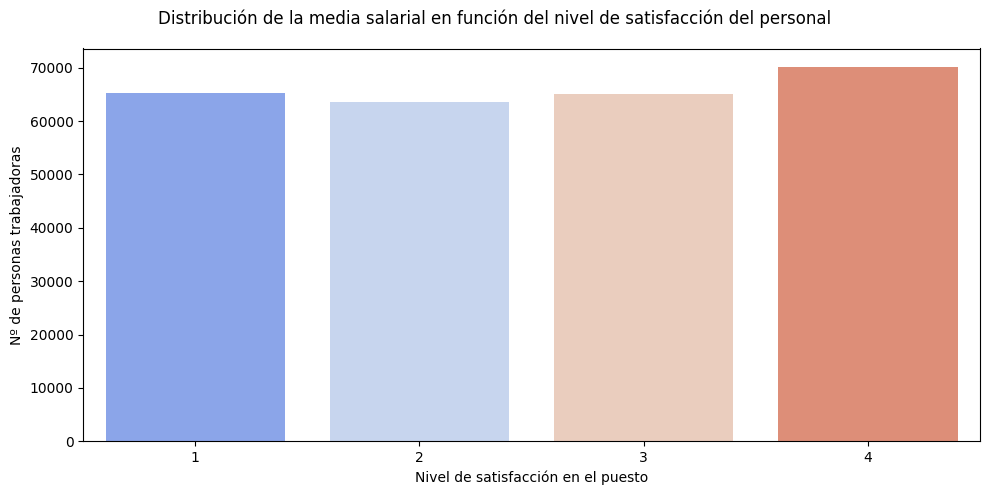

In [322]:
orden_jobsatisfaction = ["1", "2", "3", "4"]
plt.figure(figsize=(10, 5)) 
sns.barplot(x = "jobsatisfaction", 
            y = "salary", 
            data = df_sal_satis_3,
            ci = None,
            palette = "coolwarm",
            order = orden_jobsatisfaction)
plt.xlabel("Nivel de satisfacción en el puesto")
plt.ylabel("Nº de personas trabajadoras")
plt.suptitle("Distribución de la media salarial en función del nivel de satisfacción del personal")
plt.tight_layout()

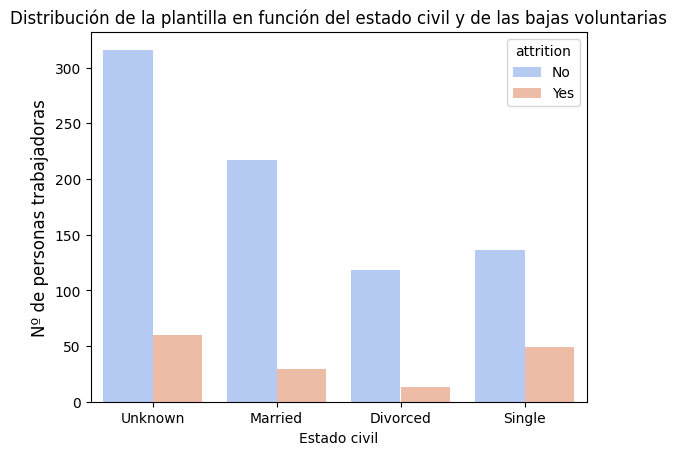

<Figure size 1200x600 with 0 Axes>

In [323]:
sns.countplot(data=df, x='maritalstatus', hue='attrition', palette = palettes)
plt.title('Distribución de la plantilla en función del estado civil y de las bajas voluntarias')
plt.xlabel('Estado civil', fontsize=10)
plt.ylabel('Nº de personas trabajadoras', fontsize=12)
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

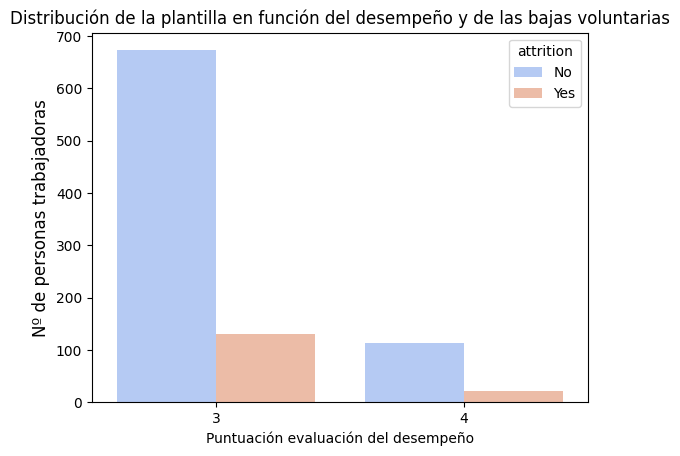

<Figure size 1200x600 with 0 Axes>

In [324]:
sns.countplot(data=df, x='performancerating', hue='attrition', palette = palettes)
plt.title('Distribución de la plantilla en función del desempeño y de las bajas voluntarias')
plt.xlabel('Puntuación evaluación del desempeño', fontsize=10)
plt.ylabel('Nº de personas trabajadoras', fontsize=12)
plt.figure(figsize=(12, 6))  # Ancho x Alto
plt.tight_layout()  # <- evita que se corte el texto
plt.show()

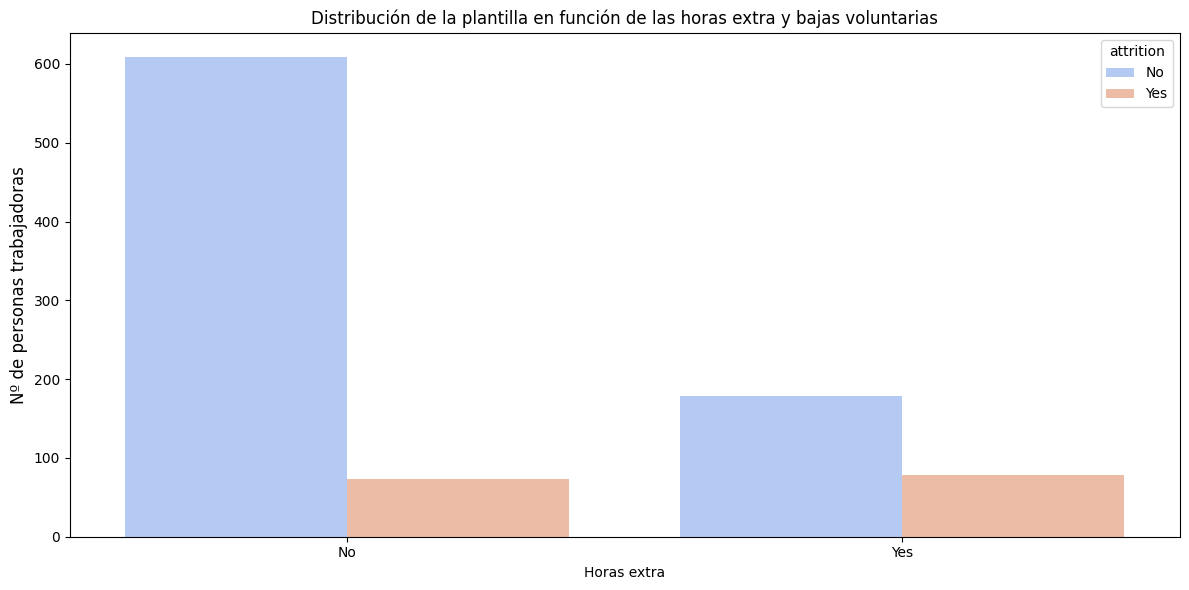

In [325]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=df, x='overtime', hue='attrition', palette=palettes)
plt.title('Distribución de la plantilla en función de las horas extra y bajas voluntarias')
plt.xlabel('Horas extra', fontsize=10)
plt.ylabel('Nº de personas trabajadoras', fontsize=12)
plt.tight_layout() 
plt.show()

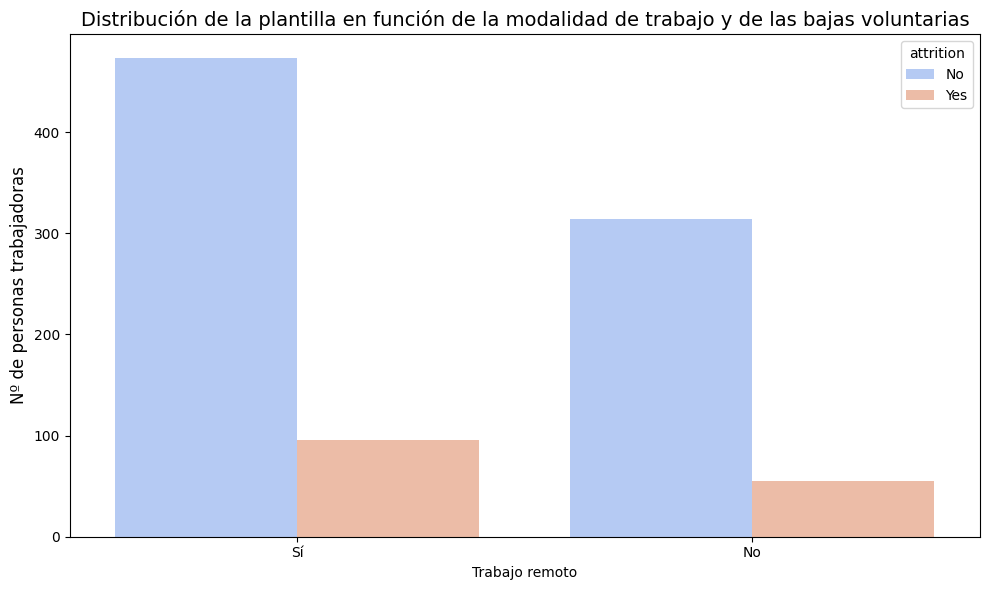

In [326]:
plt.figure(figsize=(10, 6)) 
sns.countplot(data=df, x='remotework', hue='attrition', palette = palettes)
plt.title('Distribución de la plantilla en función de la modalidad de trabajo y de las bajas voluntarias', fontsize=14)
plt.xlabel('Trabajo remoto', fontsize=10)
plt.ylabel('Nº de personas trabajadoras', fontsize=12)
plt.tight_layout() 

plt.show()

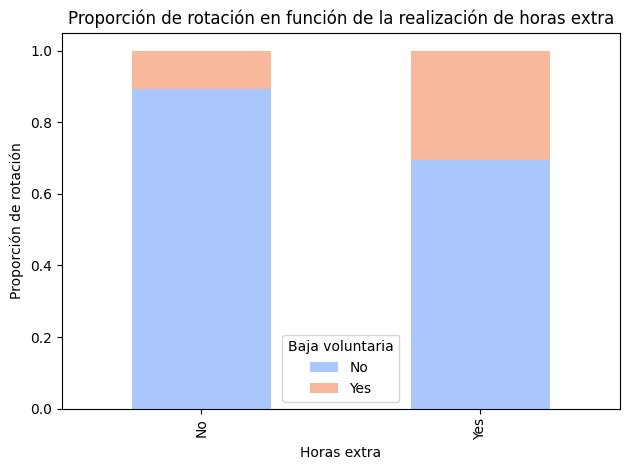

In [327]:
prop_df = df.groupby('overtime')['attrition'].value_counts(normalize=True).unstack()
colores = sns.color_palette("coolwarm", n_colors=2)

# Gráfico
prop_df.plot(kind='bar', stacked=True, color=colores)
plt.title('Proporción de rotación en función de la realización de horas extra')
plt.ylabel('Proporción de rotación')
plt.xlabel('Horas extra')
plt.legend(title='Baja voluntaria')
plt.tight_layout()
plt.show()

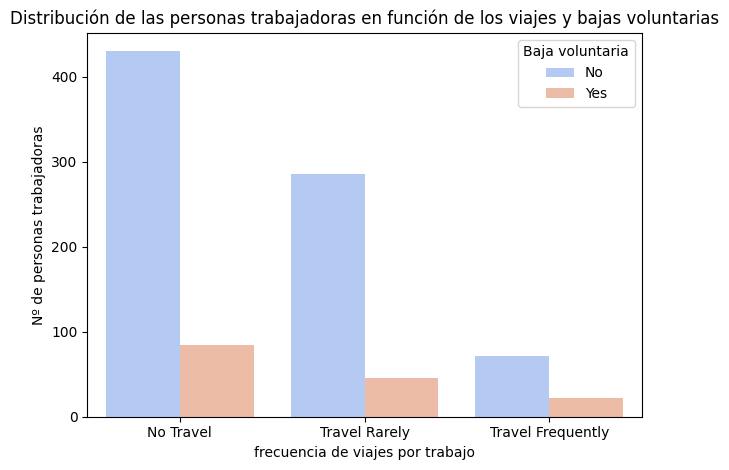

In [328]:
sns.countplot(x='businesstravel', hue='attrition', data=df, palette = palettes)
plt.title('Distribución de las personas trabajadoras en función de los viajes y bajas voluntarias')
plt.ylabel('Nº de personas trabajadoras')
plt.xlabel('frecuencia de viajes por trabajo')
plt.legend(title='Baja voluntaria')
plt.tight_layout()
plt.show()

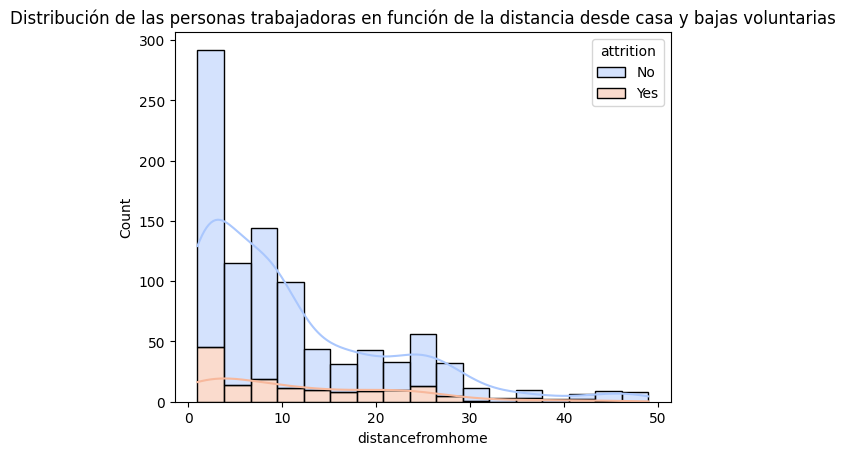

In [330]:
sns.histplot(data=df, x='distancefromhome', hue='attrition', kde=True, multiple='stack', palette = palettes)
plt.title('Distribución de las personas trabajadoras en función de la distancia desde casa y bajas voluntarias')
plt.show()

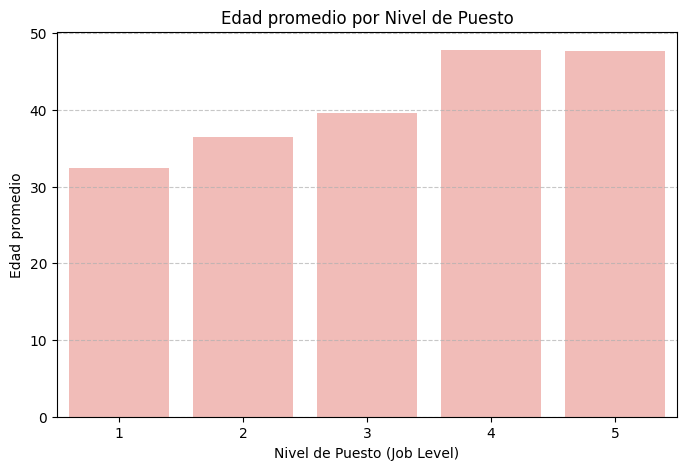

In [346]:
# Calculamos la media de edad por joblevel
edad_promedio = df.groupby('joblevel', as_index=False)['age'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(data=edad_promedio, x='joblevel', y='age', errorbar=None)
plt.title('Edad promedio por Nivel de Puesto')
plt.xlabel('Nivel de Puesto (Job Level)')
plt.ylabel('Edad promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# A medida que aumenta el nivel de puesto (de 1 a 5), también aumenta la edad promedio de los empleados.
#Esto sugiere que, en general, los empleados con más experiencia (mayor edad) tienden a ocupar puestos de mayor nivel dentro de la empresa. Es una relación lógica y esperable: el ascenso suele venir con años de servicio y madurez profesional
#La gráfica refleja una relación positiva entre edad y nivel de puesto, lo cual es coherente con modelos tradicionales de carrera profesional

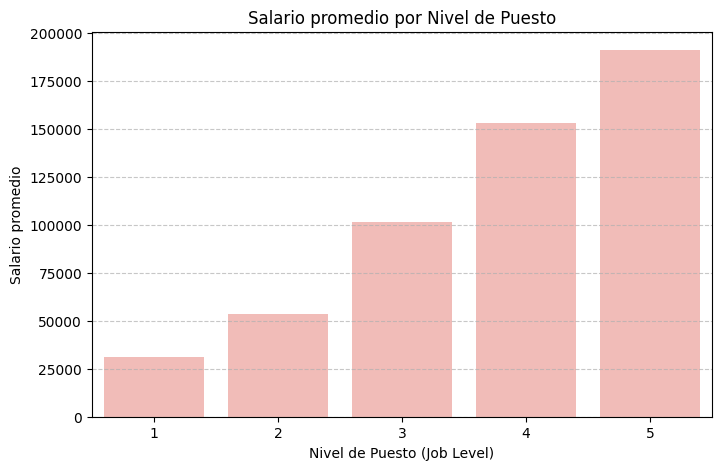

In [347]:
# Calculamos el salario promedio por joblevel
salario_promedio = df.groupby('joblevel', as_index=False)['salary'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(data=salario_promedio, x='joblevel', y='salary', errorbar=None)
plt.title('Salario promedio por Nivel de Puesto')
plt.xlabel('Nivel de Puesto (Job Level)')
plt.ylabel('Salario promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#El salario promedio aumenta claramente conforme se sube de nivel de puesto.
#Por ejemplo, si el nivel 1 tiene un salario promedio de $40k y el nivel 5 llega a $90k, esto indica que la empresa recompensa el ascenso con incrementos salariales significativos.
# Hay una fuerte correlación positiva entre nivel de puesto y salario, lo que refuerza la idea de que el crecimiento profesional va acompañado de reconocimiento económico. Esto puede ser un factor motivador para la retención y el desarrollo interno

C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\2762613449.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anos_promedio = df.groupby('age_group', as_index=False)['yearsatcompany'].mean()


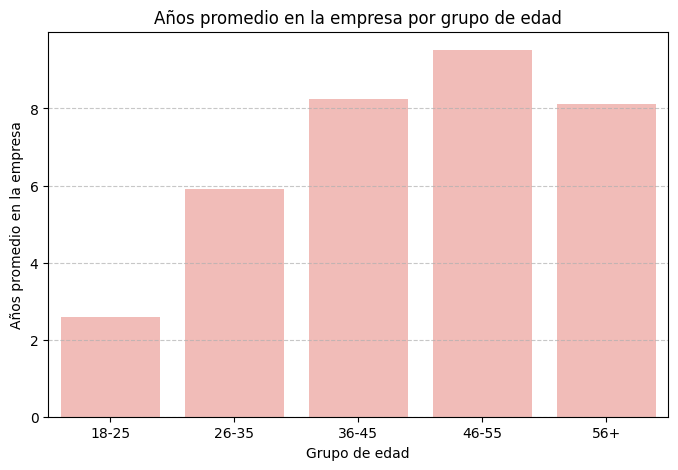

In [348]:
# Creamos rangos de edad
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 100], 
                         labels=['18-25', '26-35', '36-45', '46-55', '56+'])

# Calculamos años promedio por grupo
anos_promedio = df.groupby('age_group', as_index=False)['yearsatcompany'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(data=anos_promedio, x='age_group', y='yearsatcompany', errorbar=None)
plt.title('Años promedio en la empresa por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Años promedio en la empresa')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Los empleados más jóvenes (18-25) llevan menos tiempo en la empresa, mientras que los más mayores (46+) tienen muchos más años de antigüedad.
#Esto es totalmente esperable: los empleados más viejos han tenido más tiempo para acumular años en la compañía. También puede indicar baja rotación en la plantilla, ya que muchos empleados permanecen durante años
# Existe una relación positiva entre edad y antigüedad en la empresa, lo que sugiere estabilidad laboral y posiblemente una cultura de retención. Esto es un dato valioso para RRHH, ya que refleja lealtad y compromiso del personal.